# ME 793 Assignment 4
Moitreyee Sarkar- 18D170020


In [4]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
#read excel data file
dp = pd.read_excel('/content/drive/MyDrive/Periodic_table_data.xlsx')      
dp

,Symbol,Atomic Number,Electronegativity,Atomic Radii (pm),Thermal Conductivity,Density,Crystal System
0,H,1,2.20,53.0,0.1805,0.000090,Simple Hexagonal
1,He,2,NaN,31.0,0.1513,0.000179,Face Centered Cubic
2,Li,3,0.98,167.0,85.0000,0.534000,Body Centered Cubic
3,Be,4,1.57,112.0,190.0000,1.850000,Simple Hexagonal
4,B,5,2.04,87.0,27.0000,2.340000,Simple Trigonal
...,...,...,...,...,...,...,...
113,Fl,114,NaN,NaN,NaN,NaN,NaN
114,Mc,115,NaN,NaN,NaN,NaN,NaN
115,Lv,116,NaN,NaN,NaN,NaN,NaN
116,Ts,117,NaN,NaN,NaN,NaN,NaN


In [54]:
print("Total number of rows:", dp.shape[0])
print("Total number of columns:", dp.shape[1])

Total number of rows: 118
Total number of columns: 7


In [41]:
# Function to select red or white dataset
def call(functionToCall):
    print('\nTable\n')
    functionToCall(dp)

In [44]:
# Remove spaces from column names
def q1(Periodic_table_data):
    Periodic_table_data.columns = [x.strip().replace(' ','_') for x in Periodic_table_data.columns]
call(q1)
dp.head()


Table



,Symbol,Atomic_Number,Electronegativity,Atomic_Radii_(pm),Thermal_Conductivity,Density,Crystal_System
0,H,1,2.20,53.0,0.1805,0.000090,Simple Hexagonal
1,He,2,NaN,31.0,0.1513,0.000179,Face Centered Cubic
2,Li,3,0.98,167.0,85.0000,0.534000,Body Centered Cubic
3,Be,4,1.57,112.0,190.0000,1.850000,Simple Hexagonal
4,B,5,2.04,87.0,27.0000,2.340000,Simple Trigonal


# 1. Develop a Linear Regression based model where electronegativity is X and thermal conductivity is Y .

Estimated coefficients:
b_0 = -63.825770557934426 		
b_1 = 71.89957165910896


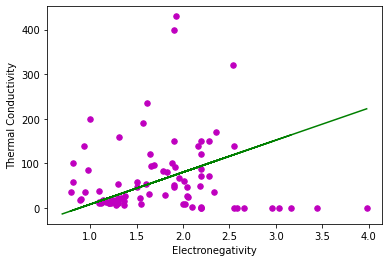

In [55]:
def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('Electronegativity')
	plt.ylabel('Thermal Conductivity')

	# function to show plot
	plt.show()

def main():
	# observations / data
	x = dp.Electronegativity
	y = dp.Thermal_Conductivity

	# estimating coefficients
	b = estimate_coef(x, y)
	print("Estimated coefficients:\nb_0 = {} \
		\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


# 2. Develop a Multi-Linear Regression based model where electronegativity is X1 and density is X2 and thermal conductivity is Y .

In [71]:
dp = dp.dropna()
x=dp[['Electronegativity','Density']]
print(x)
y=dp['Thermal_Conductivity'].values
print("Thermal Conductivity:")
print(y)

    Electronegativity   Density
0                2.20   0.00009
2                0.98   0.53400
3                1.57   1.85000
4                2.04   2.34000
5                2.55   2.27000
..                ...       ...
79               2.00  13.50000
80               2.04  11.90000
81               2.33  11.30000
82               2.02   9.81000
84               2.20   7.00000

[79 rows x 2 columns]
Thermal Conductivity:
[1.805e-01 8.500e+01 1.900e+02 2.700e+01 1.400e+02 2.583e-02 2.658e-02
 2.770e-02 1.400e+02 1.600e+02 2.350e+02 1.500e+02 2.360e-01 2.050e-01
 8.900e-03 1.000e+02 2.000e+02 1.600e+01 2.200e+01 3.100e+01 9.400e+01
 7.800e+00 8.000e+01 1.000e+02 9.100e+01 4.000e+02 1.200e+02 2.900e+01
 6.000e+01 5.000e+01 5.200e-01 1.200e-01 5.800e+01 3.500e+01 1.700e+01
 2.300e+01 5.400e+01 1.390e+02 5.100e+01 1.200e+02 1.500e+02 7.200e+01
 4.300e+02 9.700e+01 8.200e+01 6.700e+01 2.400e+01 3.000e+00 4.490e-01
 3.600e+01 1.800e+01 1.300e+01 1.100e+01 1.300e+01 1.700e+01 1.500e+01
 1.

Coefficients:  [-11.70212511   4.59111107]
Variance score: -0.1427845010975839


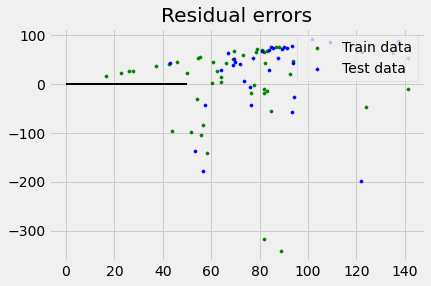

In [76]:
# splitting x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,
                                                    random_state=1)
 
# create linear regression object
reg = linear_model.LinearRegression()
 
# train the model using the training sets
reg.fit(x_train, y_train)
 
# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(x_test, y_test)))
 
# plot for residual error 
 
## plotting residual errors in training data
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

# 3. Develop a Gradient Descent based model where electronegativity is X1 and density is X2 and thermal conductivity is Y .

In [103]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x)
X_transform

array([[ 0.65470422, -1.35793147],
       [-1.2574289 , -1.2592575 ],
       [-0.33270878, -1.0160425 ],
       [ 0.40393267, -0.92548373],
       [ 1.20326701, -0.9384207 ],
       [ 1.9712549 , -1.35771706],
       [ 2.5981838 , -1.3576838 ],
       [ 3.4445378 , -1.3576339 ],
       [-1.33579501, -1.17849385],
       [-0.74021256, -1.03637202],
       [-0.27001589, -0.85895075],
       [ 0.18450755, -0.92733187],
       [ 0.639031  , -1.02158692],
       [ 1.25028667, -0.97538346],
       [ 2.15933357, -1.35735483],
       [-1.50820046, -1.19863856],
       [-1.22608246, -1.07333479],
       [-0.66184645, -0.80535474],
       [-0.37972845, -0.51889331],
       [-0.23866945, -0.2287356 ],
       [-0.19164978, -0.03652922],
       [-0.36405523,  0.01706679],
       [ 0.074795  ,  0.09653673],
       [ 0.15316111,  0.27950242],
       [ 0.20018078,  0.28874311],
       [ 0.18450755,  0.2979838 ],
       [-0.207323  , -0.0402255 ],
       [ 0.04344855, -0.26569837],
       [ 0.356913  ,

In [104]:
#GD for linear regression
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s
   

   
        
        
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept
    

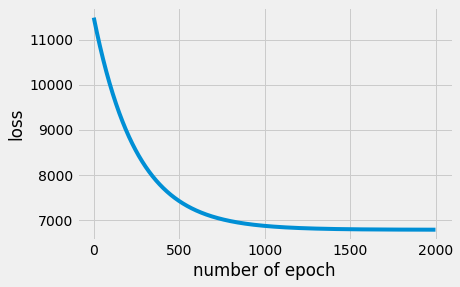

In [105]:
w,b=gradient_descent(X_transform,y)

In [106]:
print("weight:",w)
print("bias:",b)

weight: [ 0.11661722 18.21159512]
bias: 65.42854397947173


In [107]:
#predict
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [108]:
y_pred=predict(X_transform)
y_pred

array([ 40.77479572,  42.34881843,  46.88598973,  48.62111455,
        48.47872788,  40.93223281,  41.00594935,  41.10555755,
        43.81051434,  46.46823477,  49.75419219,  48.56186826,
        46.89833869,  47.81106027,  40.9607629 ,  43.42354164,
        45.73842306,  50.68456682,  55.93438623,  61.23507081,
        64.74093887,  65.69690225,  67.19535421,  70.53659007,
        70.7103611 ,  70.87682107,  64.67179601,  60.59481971,
        58.64557987,  60.22489902,  57.02774449,  51.41455774,
        45.6718657 ,  49.43161425,  55.64029484,  62.52653961,
        69.50934375,  75.09787869,  79.42583768,  82.50984982,
        82.52447196,  81.16354799,  76.06556641,  69.92968421,
        65.30139281,  65.26697754,  63.2639747 ,  61.72486644,
        57.45174048,  46.81073895,  52.61811449,  61.27282931,
        63.36325268,  63.36508045,  64.17468931,  65.01430019,
        65.89670745,  58.22827033,  67.18117749,  68.2918765 ,
        69.37257349,  70.2158399 ,  71.12642141,  71.96